# Working with Text Data

In [1]:
from sklearn.datasets import load_files

reviews_train = load_files("aclImdb/train")

# load_files returns a bunch, containing training texts and training labels
text_train, y_train = reviews_train.data, reviews_train.target
print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train)))
print("text_train[6]:\n{}".format(text_train[6]))

type of text_train: <class 'list'>
length of text_train: 25000
text_train[6]:
b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [3]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [5]:
import numpy as np

In [6]:
print("Samples per class (training): {}".format(np.bincount(y_train)))

Samples per class (training): [12500 12500]


In [7]:
y_train

array([1, 0, 1, ..., 0, 0, 0])

In [8]:
y_train.shape

(25000,)

In [9]:
reviews_test = load_files("aclImdb/test/")

text_test, y_test = reviews_test.data, reviews_test.target

print("Number of documents in test data: {}".format(len(text_test)))

print("Samples per class (test): {}".format(np.bincount(y_test)))

text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

Number of documents in test data: 25000
Samples per class (test): [12500 12500]


given a review, we want to assign the label “positive” or “negative” based on the text content of the review. 

## Representing Text Data as a Bag of Words

The bag-of-words representation is implemented in CountVectorizer, which is a transformer.

In [10]:
bards_words = ["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [12]:
print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("Vocabulary content:\n {}".format(vect.vocabulary_))

Vocabulary size: 13
Vocabulary content:
 {'he': 4, 'think': 10, 'wise': 12, 'man': 8, 'is': 6, 'the': 9, 'knows': 7, 'but': 1, 'to': 11, 'fool': 3, 'himself': 5, 'be': 0, 'doth': 2}


The vocabulary consists of 13 words, from "be" to "wise"

To create the bag-of-words representation for the training data, we call the transform method:

In [13]:
bag_of_words = vect.transform(bards_words)

print("bag_of_words: {}".format(repr(bag_of_words))) # with no zeros (because it's a sparse matrix)

bag_of_words: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


The matrix is of shape 2×13, with one row for each of the two data points and one feature for each of the words in the vocabulary

In [14]:
print("Dense representation of bag_of_words:\n{}".format(bag_of_words.toarray()))

Dense representation of bag_of_words:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


### Bag-of-Words for Movie Reviews

In [15]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)

print("X_train:\n{}".format(repr(X_train)))

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


The shape of X_train, the bag-of-words representation of the training data, is 25,000×74,849, indicating that the vocabulary contains 74,849 entries.

In [16]:
feature_names = vect.get_feature_names()

print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 74849
First 20 features:
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
Features 20010 to 20030:
['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
Every 2000th feature:
['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


In [17]:
print("Vocabulary size: {}".format(len(vect.vocabulary_)))

Vocabulary size: 74849


In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)

print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.88


 We know that LogisticRegression has a regularization parameter, C, which we can tune via cross-validation:

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.89
Best parameters:  {'C': 0.1}


In [22]:
X_test = vect.transform(text_test)
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))

Test score: 0.88


We can set the minimum number of documents a token needs to appear in with the `min_df` parameter:

In [23]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)

print("X_train with min_df: {}".format(repr(X_train)))

X_train with min_df: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


By requiring at least five appearances of each token, we can bring down the number of features to 27,271

In [24]:
feature_names = vect.get_feature_names()

print("First 50 features:\n{}".format(feature_names[:50]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 700th feature:\n{}".format(feature_names[::700]))

First 50 features:
['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
Features 20010 to 20030:
['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
Every 700th feature:
['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronunciati

In [25]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.89


The best validation accuracy of the grid search is still 89%, unchanged from before.

## Stopwords

In [26]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop words: 318
Every 10th stopword:
['whom', 'wherever', 'seemed', 'something', 'interest', 'should', 'anyone', 'beforehand', 'nevertheless', 'his', 'well', 'not', 'whereby', 'meanwhile', 'hasnt', 'however', 'mine', 'front', 'serious', 'then', 'by', 'together', 'into', 'whether', 'while', 'again', 'therefore', 'where', 'inc', 'thence', 'either', 'she']


In [27]:
# Specifying stop_words="english" uses the built-in list.
# We could also augment it and pass our own.
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)

X_train = vect.transform(text_train)
print("X_train with stop words:\n{}".format(repr(X_train)))

X_train with stop words:
<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


There are now 305 (27,271–26,966) fewer features in the dataset, which means that most, but not all, of the stopwords appeared

In [28]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)

grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.88


 it doesn’t seem worth using this list

## Rescaling the Data with tf–idf

the term frequency–inverse document frequency (tf–idf)

The intuition of this method is to give high weight to any term that appears often in a particular document, but not in many documents in the corpus

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5),
                     LogisticRegression())

param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.89


In this case, tf–idf had no impact. We can also inspect which words tf–idf found most important. 

Keep in mind that the tf–idf scaling is meant to find words that distinguish documents, but it is a purely unsupervised technique.

In [30]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]

# transform the training dataset
X_train = vectorizer.transform(text_train)

# find maximum value for each of the features over the dataset
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

# get feature names
feature_names = np.array(vectorizer.get_feature_names())

print("Features with lowest tfidf:\n{}".format(feature_names[sorted_by_tfidf[:20]]))

print("Features with highest tfidf: \n{}".format(feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
Features with highest tfidf: 
['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


In [31]:
sorted_by_tfidf[:10]

array([23668, 10103, 11968, 16943, 22554, 10006,  8046, 15198, 23882, 17258])

In [32]:
feature_names[:10]

array(['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06'],
      dtype='<U20')

In [34]:
feature_names[1]

'000'

In [35]:
X_train.shape

(25000, 27271)

In [36]:
max_value.shape

(27271,)

Features with low tf–idf are those that either are very commonly used across documents or are only used sparingly, and only in very long documents. 

We can also find the words that have low inverse document frequency—that is, those that appear frequently and are therefore deemed **less important**.

In [37]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Features with lowest idf:\n{}".format(feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


As expected, these are mostly English stopwords like "the" and "no". But some are clearly domain-specific to the movie reviews, like "movie", "film", "time", "story", and so on. Interestingly, "good", "great", and "bad" are also among the most frequent and therefore “least relevant” words according to the tf–idf measure, even though we might expect these to be very important for our sentiment analysis task.

## Investigating Model Coefficients

In [39]:
import introduction_to_ml_with_python.mglearn as mglearn

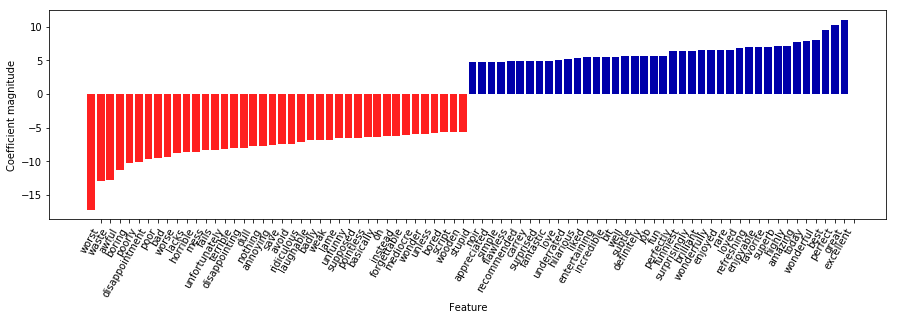

In [40]:
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_,
    feature_names, n_top_features=40)
# Largest and smallest coefficients of logistic regression trained on tf-idf features

## Bag-of-Words with More Than One Word (n-Grams)

Pairs of tokens are known as bigrams, triplets of tokens are known as trigrams, and more generally sequences of tokens are known as n-grams

In [41]:
print("bards_words:\n{}".format(bards_words))

bards_words:
['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [42]:
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)

print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 13
Vocabulary:
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [43]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)

print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 14
Vocabulary:
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [44]:
print("Transformed data (dense):\n{}".format(cv.transform(bards_words).toarray()))

Transformed data (dense):
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


For most applications, the minimum number of tokens should be one, as single words often capture a lot of meaning

In [45]:
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)

print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 39
Vocabulary:
['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


In [46]:
pipe = make_pipeline(
    TfidfVectorizer(min_df=5), 
    LogisticRegression()
)

# running the grid search takes a long time because of the
# relatively large grid and the inclusion of trigrams
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100],
              "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

Best cross-validation score: 0.91
Best parameters:
{'tfidfvectorizer__ngram_range': (1, 3), 'logisticregression__C': 100}


As you can see from the results, we improved performance by a bit more than a percent by adding bigram and trigram features.

In [48]:
import matplotlib.pyplot as plt

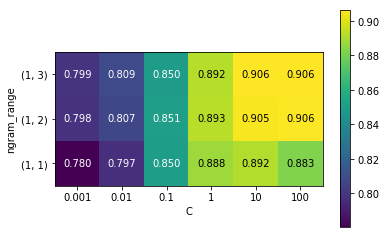

In [49]:
# extract scores from grid_search
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T

# visualize heat map
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])

plt.colorbar(heatmap)

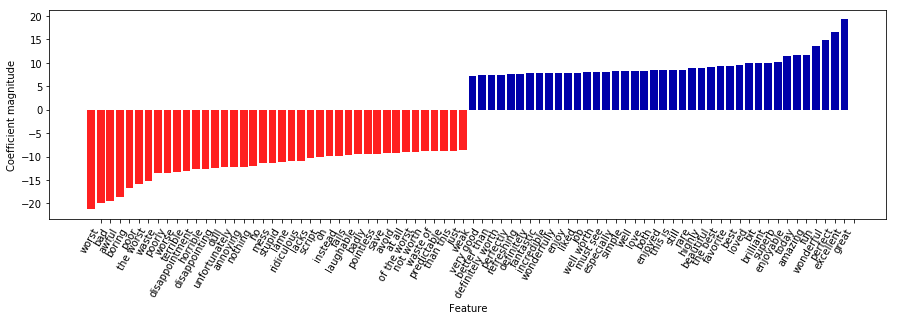

In [50]:
# extract feature names and coefficients
vect = grid.best_estimator_.named_steps['tfidfvectorizer']

feature_names = np.array(vect.get_feature_names())

coef = grid.best_estimator_.named_steps['logisticregression'].coef_

mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)
# Most important features when using unigrams, bigrams, and trigrams with tf-idf rescaling

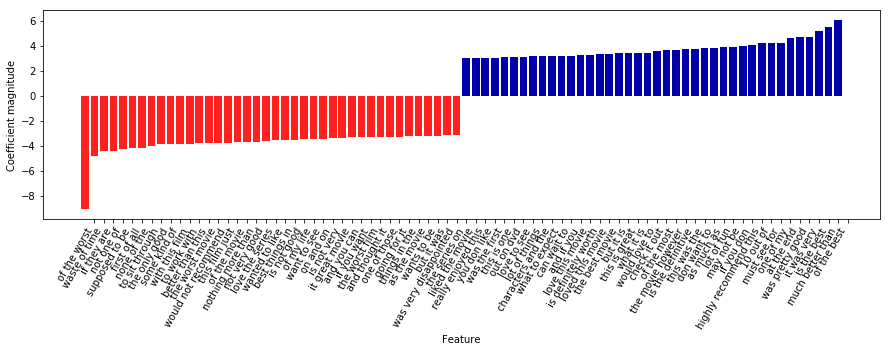

In [51]:
# find 3-gram features
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
# visualize only 3-gram features
mglearn.tools.visualize_coefficients(coef.ravel()[mask],
                                     feature_names[mask], n_top_features=40)

## Advanced Tokenization, Stemming, and Lemmatization

In [58]:
import spacy
import nltk

# load spacy's English-language models
en_nlp = spacy.load('en')
# instantiate nltk's Porter stemmer
stemmer = nltk.stem.PorterStemmer()

# define function to compare lemmatization in spacy with stemming in nltk
def compare_normalization(doc):
    # tokenize document in spacy
    doc_spacy = en_nlp(doc)
    # print lemmas found by spacy
    print("Lemmatization:")
    print([token.lemma_ for token in doc_spacy])
    # print tokens found by Porter stemmer
    print("Stemming:")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [59]:
compare_normalization(u"Our meeting today was worse than yesterday, "
                       "I'm scared of meeting the clients tomorrow.")

Lemmatization:
['-PRON-', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', '-PRON-', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
Stemming:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


In [103]:
from spacy.tokenizer import Tokenizer

In [107]:
# Technicality: we want to use the regexp-based tokenizer
# that is used by CountVectorizer and only use the lemmatization
# from spacy. To this end, we replace en_nlp.tokenizer (the spacy tokenizer)
# with the regexp-based tokenization.
import re
# regexp used in CountVectorizer
regexp = re.compile('(?u)\\b\\w\\w+\\b')

# replace the tokenizer with the preceding regexp
def custom_tokenizer_for_nlp():
    return Tokenizer(en_nlp.vocab, token_match=regexp.match)

en_nlp.tokenizer = custom_tokenizer_for_nlp()

# create a custom tokenizer using the spacy document processing pipeline
# (now using our own tokenizer)
def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

# define a count vectorizer with the custom tokenizer
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

In [108]:
# transform text_train using CountVectorizer with lemmatization
X_train_lemma = lemma_vect.fit_transform(text_train)
print("X_train_lemma.shape: {}".format(X_train_lemma.shape))

# standard CountVectorizer for reference
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train.shape: {}".format(X_train.shape))

X_train_lemma.shape: (25000, 37686)
X_train.shape: (25000, 27271)


**we expect lemmatization to improve performance most when the dataset is small**. To illustrate how lemmatization can help, we will use `StratifiedShuffleSplit` for cross-validation, using only 1% of the data as training data and the rest as test data:

In [109]:
# build a grid search using only 1% of the data as the training set
from sklearn.model_selection import StratifiedShuffleSplit

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.99,train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv)

# perform grid search with standard CountVectorizer
grid.fit(X_train, y_train)
print("Best cross-validation score (standard CountVectorizer): {:.3f}".format(grid.best_score_))

# perform grid search with lemmatization
grid.fit(X_train_lemma, y_train)
print("Best cross-validation score "
      "(lemmatization): {:.3f}".format(grid.best_score_))

Best cross-validation score (standard CountVectorizer): 0.721
Best cross-validation score (lemmatization): 0.711
